In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import os
from tpot import TPOTRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import *
from sklearn.svm import *
import re
import math

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium2.csv')
data

,best_topic,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,developer,publisher,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,indé,0,1,2,3,4,followers,mode
0,topic_11,16900,GROUND BRANCH,early_access tactical action fps military,0.016274,0.016274,0.016274,0.016274,0.178791,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.528276,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,1,15.49,260.0,BlackFoot Studios,BlackFoot Studios,1,1,50000.0,9,0.807278,742,192.307692,2,1,0,0.0,1.0,0.0,0.0,0.0,45908,0.029598
1,topic_16,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,1,6.99,1003.0,Nemesys Games,Nemesys Games,1,0,2138.0,2,0.909091,11,2.131605,4,4,0,0.0,0.0,0.0,1.0,0.0,138,0.043968
2,topic_2,116100,Super Toy Cars,racing multiplayer local_multiplayer arcade 1980s,0.015774,0.015774,0.492073,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.223992,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,1,6.99,1790.0,Eclipse Games,Eclipse Games,1,1,34319.0,2,0.603604,333,19.172626,3,4,0,0.0,0.0,0.0,1.0,0.0,510,0.051236
3,topic_6,200150,Battle Chess: Game of Kings™,strategy chess casual board_game puzzle_platfo...,0.180916,0.016457,0.016457,0.016457,0.016457,0.016457,0.272457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.266852,0.016457,0.016457,1,22.99,1237.0,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,1,1,20000.0,7,0.460784,204,16.168149,21,1,1,0.0,1.0,0.0,0.0,0.0,0,0.041803
4,topic_18,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,1,6.99,1791.0,Gaijin Games,Gaijin Games,1,1,25719.0,5,0.533835,133,14.360134,7,7,0,0.0,0.0,0.0,1.0,0.0,166,0.049451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,topic_5,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,Choice of Games,Choice of Games,1,1,474.0,0,0.666667,3,13.941176,94,94,0,0.0,0.0,0.0,0.0,1.0,69,0.069624
19245,topic_19,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,HaDe,HaDe,1,0,4426.0,2,0.954545,22,130.176471,3,1,0,0.0,1.0,0.0,0.0,0.0,1070,0.088549
19246,topic_8,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,Meridian93 Studio,HH-Games,1,0,890.0,5,0.400000,5,26.969697,29,1,1,0.0,1.0,0.0,0.0,0.0,138,0.019909
19247,topic_12,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,Thoth Technology Ltd.,Thoth Technology Lt

[array([64.,  0.]), array([ 687., 1621.])]

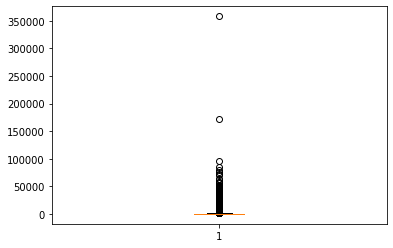

In [51]:
B = plt.boxplot(data.followers)
[item.get_ydata() for item in B['whiskers']]

In [52]:
data_correction = data[data['followers'] <= 1621]

In [71]:
data_correction.followers.median()

137.0

In [88]:
**1.6

1584.893192461114

In [69]:
(10+2)**1.98

137.01839221750478

In [5]:
#data.name = data.name.str.replace(r'[^\x00-\x7F]+', 'Nan')
#data = data[data.name != 'Nan']

In [6]:
data.columns

Index(['best_topic', 'steam_appid', 'name', 'top_5_tags', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7',
       'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13',
       'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19',
       'english', 'price', 'days_on_steam', 'developer', 'publisher',
       'is_a_remake', 'has_a_website', 'owner_estimated', 'score_descriptif',
       'ratio', 'nb_review', 'sells_per_days', 'nb_game_by_publisher',
       'nb_game_by_dev', 'indé', '0', '1', '2', '3', '4', 'followers', 'mode'],
      dtype='object')

In [7]:
data['target'] = data['nb_review']

In [8]:
def log(value):
    return math.log(value)

In [9]:
data.target = data.target.apply(log)

In [10]:
data

,best_topic,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,developer,publisher,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,indé,0,1,2,3,4,followers,mode,target
0,topic_11,16900,GROUND BRANCH,early_access tactical action fps military,0.016274,0.016274,0.016274,0.016274,0.178791,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.528276,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,1,15.49,260.0,BlackFoot Studios,BlackFoot Studios,1,1,50000.0,9,0.807278,742,192.307692,2,1,0,0.0,1.0,0.0,0.0,0.0,45908,0.029598,6.609349
1,topic_16,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,1,6.99,1003.0,Nemesys Games,Nemesys Games,1,0,2138.0,2,0.909091,11,2.131605,4,4,0,0.0,0.0,0.0,1.0,0.0,138,0.043968,2.397895
2,topic_2,116100,Super Toy Cars,racing multiplayer local_multiplayer arcade 1980s,0.015774,0.015774,0.492073,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.223992,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,1,6.99,1790.0,Eclipse Games,Eclipse Games,1,1,34319.0,2,0.603604,333,19.172626,3,4,0,0.0,0.0,0.0,1.0,0.0,510,0.051236,5.808142
3,topic_6,200150,Battle Chess: Game of Kings™,strategy chess casual board_game puzzle_platfo...,0.180916,0.016457,0.016457,0.016457,0.016457,0.016457,0.272457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.266852,0.016457,0.016457,1,22.99,1237.0,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,1,1,20000.0,7,0.460784,204,16.168149,21,1,1,0.0,1.0,0.0,0.0,0.0,0,0.041803,5.318120
4,topic_18,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,1,6.99,1791.0,Gaijin Games,Gaijin Games,1,1,25719.0,5,0.533835,133,14.360134,7,7,0,0.0,0.0,0.0,1.0,0.0,166,0.049451,4.890349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,topic_5,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,Choice of Games,Choice of Games,1,1,474.0,0,0.666667,3,13.941176,94,94,0,0.0,0.0,0.0,0.0,1.0,69,0.069624,1.098612
19245,topic_19,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,HaDe,HaDe,1,0,4426.0,2,0.954545,22,130.176471,3,1,0,0.0,1.0,0.0,0.0,0.0,1070,0.088549,3.091042
19246,topic_8,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,Meridian93 Studio,HH-Games,1,0,890.0,5,0.400000,5,26.969697,29,1,1,0.0,1.0,0.0,0.0,0.0,138,0.019909,1.609438
19247,topic_12,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.01618

In [11]:
X = data.drop(columns=['best_topic','steam_appid', 'name','top_5_tags', 'developer', 'publisher', 'owner_estimated', 'ratio', 'nb_review', 'sells_per_days', 'is_a_remake', '0', '1', '2', '3', '4', 'nb_game_by_publisher', 'indé', 'target', 'mode'])
y = data['target']

In [12]:
X.dtypes

topic_0             float64
topic_1             float64
topic_2             float64
topic_3             float64
topic_4             float64
topic_5             float64
topic_6             float64
topic_7             float64
topic_8             float64
topic_9             float64
topic_10            float64
topic_11            float64
topic_12            float64
topic_13            float64
topic_14            float64
topic_15            float64
topic_16            float64
topic_17            float64
topic_18            float64
topic_19            float64
english               int64
price               float64
days_on_steam       float64
has_a_website         int64
score_descriptif      int64
nb_game_by_dev        int64
followers             int64
dtype: object

In [13]:
X.shape

(19249, 27)

In [14]:
y.shape

(19249,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [16]:
pd.DataFrame(X_test)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,has_a_website,score_descriptif,nb_game_by_dev,followers
11044,0.016003,0.695942,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,0.016003,1,2.89,587.0,0,4,1,103
10772,0.016086,0.016086,0.016086,0.496222,0.016086,0.016086,0.016086,0.016086,0.016086,0.016086,0.016086,0.016086,0.214236,0.016086,0.016086,0.016086,0.016086,0.016086,0.016086,0.016086,1,5.99,392.0,1,1,7,89
821,0.015090,0.015090,0.015090,0.015090,0.015090,0.015090,0.015090,0.462325,0.015090,0.015090,0.015090,0.015090,0.015090,0.015090,0.155320,0.015090,0.015090,0.125816,0.015090,0.015090,1,14.99,1751.0,0,1,2,799
1008,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.314978,0.401545,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,0.015749,1,11.49,1456.0,0,6,1,2949
15013,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.528462,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.016015,0.183268,0.016015,1,6.19,362.0,0,1,1,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.016772,0.016772,0.016772,0.016772,0.681339,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,0.016772,1,6.99,1360.0,1,8,2,0
5035,0.015878,0.015878,0.015878,0.015878,0.015878,0.331160,0.015878,0.015878,0.015878,0.015878,0.015878,0.015878,0.015878,0.015878,0.015878,0.383035,0.015878,0.015878,0.015878,0.015878,1,4.79,1031.0,1,10,2,178
12393,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.699533,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,0.015814,1,7.19,211.0,1,3,1,1466
10149,0.015674,0.015674,0.015674,0.015674,0.015674,0.217727,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.015674,0.500136,1,3.99,577.0,1,6,1,59


# RandomForestRegressor

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.30108277, -0.25434847, -0.25090622, ...,  1.83261318,
        -0.36496565,  0.8655109 ],
       [ 2.49371631, -0.25304282, -0.24972757, ..., -1.26538945,
        -0.36496565, -0.22519584],
       [-0.30528833, -0.26011056, -0.25610787, ...,  0.67086219,
        -0.270133  , -0.20173978],
       ...,
       [-0.30348385, -0.25763822, -0.253876  , ...,  1.05811252,
        -0.36496565,  0.65480393],
       [-0.30456006, -0.25911276, -0.25520712, ..., -0.10363847,
        -0.36496565, -0.21167879],
       [-0.30048984, -0.25353609, -0.25017286, ...,  1.44536285,
        -0.36496565, -0.24050191]])

In [21]:
forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)
model = forest

model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                      min_samples_split=14)

In [22]:
cv_results = cross_validate(model, X_test, y_test, cv=10)

In [23]:
cv_results['test_score']


array([0.69912234, 0.68872018, 0.70179927, 0.7013033 , 0.6902533 ,
       0.69744694, 0.67289036, 0.66480177, 0.69009223, 0.70043849])

In [24]:
cv_results['test_score'].mean()

0.6906868188044548

(array([ 256.,  599.,  847., 1030.,  967.,  761.,  551.,  415.,  246.,
         103.]),
 array([0.50996891, 1.09298913, 1.67600934, 2.25902956, 2.84204978,
        3.42506999, 4.00809021, 4.59111042, 5.17413064, 5.75715086,
        6.34017107]),
 <BarContainer object of 10 artists>)

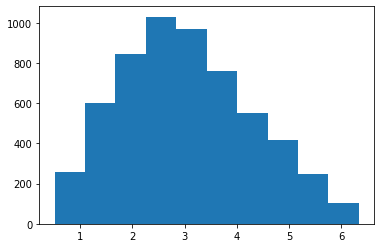

In [25]:
plt.hist(model.predict(X_test))

(array([ 566.,  473.,  838., 1028., 1095.,  794.,  463.,  352.,  138.,
          28.]),
 array([0.        , 0.75735313, 1.51470625, 2.27205938, 3.02941251,
        3.78676563, 4.54411876, 5.30147188, 6.05882501, 6.81617814,
        7.57353126]),
 <BarContainer object of 10 artists>)

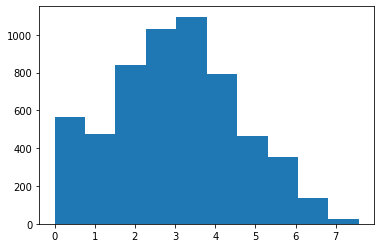

In [26]:
plt.hist(y_test)

In [27]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_ridge,coef_lasso
topic_0,0,0
topic_1,0,0
topic_2,0,0
topic_3,0,0
topic_4,0,0
topic_5,0,0
topic_6,0,0
topic_7,0,0
topic_8,0,0
topic_9,0,0


In [28]:
# Preprocessor (prepare the dataset)
num_transformer = make_pipeline( StandardScaler())

preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    remainder='passthrough')

In [29]:
pipe = make_pipeline(preproc, RandomForestRegressor(bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14))

In [30]:
X_train = pd.DataFrame(X_train)

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9d4275ca0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                                       min_samples_split=14))])

In [32]:
pipe.score(X_test,y_test)

0.7159240872975674

In [33]:
alpha = data.owner_estimated.sum() / data.nb_review.sum()

In [34]:
alpha

130.77166307431713

In [35]:
_ = pipe.predict(X_test)

In [36]:
predicted = pd.DataFrame(_)

In [37]:
predicted.head(50)

,0
0,2.402535
1,2.042573
2,4.507713
3,5.203372
4,2.917724
5,2.519184
6,4.319421
7,3.630947
8,1.791416
9,2.255796


In [38]:
def exp(value):
    return math.exp(value)

In [39]:
y_test = pd.DataFrame(y_test)

In [40]:
y_test

,target
11044,4.276666
10772,2.397895
821,4.430817
1008,5.484797
15013,2.772589
...,...
21,5.407172
5035,3.988984
12393,4.779123
10149,0.000000


In [41]:
predicted[0] = round(predicted[0].apply(exp))
y_test['target'] = round(y_test['target'].apply(exp))

In [42]:
predicted[0] = predicted[0] * alpha
y_test['target'] = y_test['target'] * alpha

In [43]:
predicted.mean()

0    6038.865567
dtype: float64

In [44]:
predicted

,0
0,1438.488294
1,1046.173305
2,11900.221340
3,23800.442680
4,2353.889935
...,...
5770,9546.331404
5771,2484.661598
5772,6930.898143
5773,653.858315


In [45]:
y_test.mean()

target    8782.058781
dtype: float64

In [46]:
data.owner_estimated.mean()

9008.196737492857

In [47]:
i = 0
mae = 0
for y in y_test.target:
    rmse = (y- predicted[0][i])**2
    mae += rmse**0.5
    i+= 1
mae = mae/ 5775

In [48]:
mae

4753.476358308923